## Machine Learning IPN - Trabajo 15 marzo 2021
Mario Alberto Ponce Pacheco

## 1. Cargar los datos (1 punto)
Abre el dataset work/dataset/admission_predict.csv con pandas y muestra las primeras 5 filas.

In [37]:
import numpy as np
import pandas as pd

np.random.seed(1234567890)

data = pd.read_csv("datasets/admission_predict.csv", sep = ',')
data.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2. Seleccionar las columnas de trabajo (2 puntos)
Selecciona las columnas del dataframe y construye la matriz X, o el dataframe X. Puedes renombrar cada columna como x1, x2, x3, ..., xn.

>Pista: Crea un nuevo dataframe con las series de cada columna como un eje (columna) xn.

In [38]:
X = pd.DataFrame({
    "x1": data["GRE Score"],
    "x2": data["TOEFL Score"],
    "x3": data["University Rating"],
    "x4": data["SOP"],
    "x5": data["LOR "],
    "x6": data["CGPA"],
    "x7": data["Research"]
})

y = data["Chance of Admit "]
X.describe()

,x1,x2,x3,x4,x5,x6,x7
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


## 3. Visualiza cada eje respecto al valor de predicción (3 puntos)
Investiga como crear 7 gráficas usando subplots de Matplotlib, o usa un for para graficar cada eje respecto a Chance of Admit.

Por ejemplo, la gráfica tipo scatter de GRE Score vs Chance of Admit, la gráfica tipo scatter de TOEFL Score vs Chance of Admit, etc.

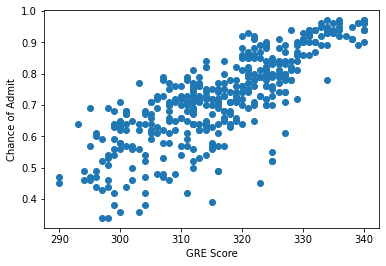

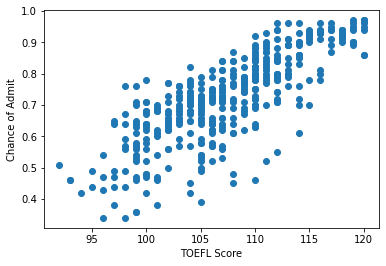

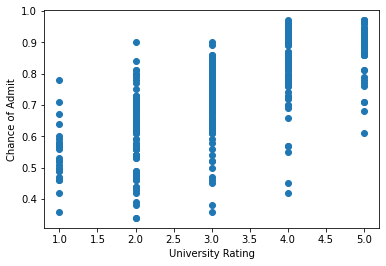

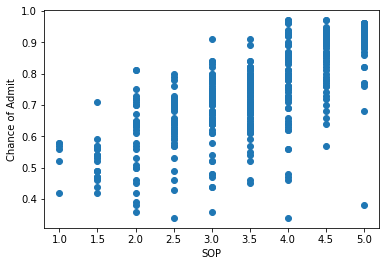

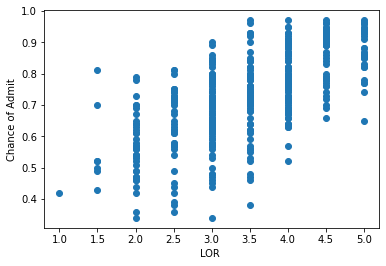

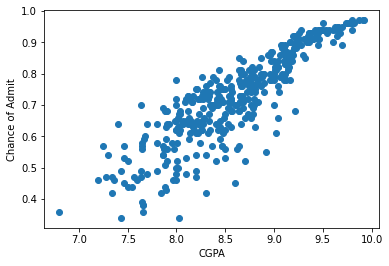

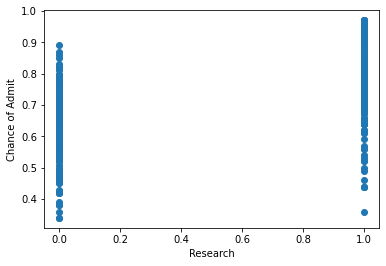

In [39]:
import matplotlib.pyplot as plt
for k in data.keys()[1:-1]:
    plt.scatter(data[k],y)
    plt.xlabel(k)
    plt.ylabel('Chance of Admit')
    plt.show()

## 4. Crea un regresor lineal (4 puntos)
Construye un regresor de la clase LinearRegression de sklearn.

Ajusta el regresor a X, y.

Obtén el score (R2) sobre X, y.

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)
regressor.score(X,y)

0.8034713719824393

## 5. Descarta ejes (2 puntos)
Descarta los ejes de pendiente cercana a 0, y deja sólo a los más significativos.

In [41]:
regressor.coef_

array([ 0.00173741,  0.00291958,  0.00571666, -0.00330517,  0.02235313,
        0.11893945,  0.02452511])

In [42]:
X_ = pd.DataFrame({
    "x5": X["x5"],
    "x6": X["x6"],
    "x7": X["x7"]
})
regressor.fit(X_, y)
regressor.score(X_,y)

0.786915845420324

## 6. Visualización en 2D (4 puntos)
Crea una gráfica 2D con los dos ejes más representativos, dónde el color sea el eje correspondiente a Chance of Admit.


In [43]:
regressor.coef_

array([0.02267851, 0.17036687, 0.03573523])

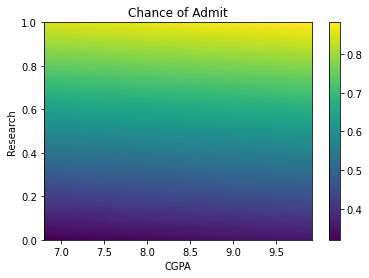

In [84]:
x6 = np.linspace(min(X_['x6']), max(X_['x6']), 101)
x7 = np.linspace(min(X_['x7']), max(X_['x7']), 101)
z = np.zeros((101,101))

m6 = regressor.coef_[-2]
m7 = regressor.coef_[-1]
b = regressor.intercept_

for i in range(101):
    for j in range(101):
        z[i][j] = b + m6*x6[i] + m7*x7[j]
        
fig, ax = plt.subplots()
plt.pcolormesh(x6, x7, z)
ax.set_xlabel('CGPA')
ax.set_ylabel('Research')
ax.set_title('Chance of Admit')
plt.colorbar()

## 7. Visualización en 3D (4 puntos)
Crea una gráfica 3D con los dos ejes más representativos, y el plano ajustado correspondiente a Chance of Admit.

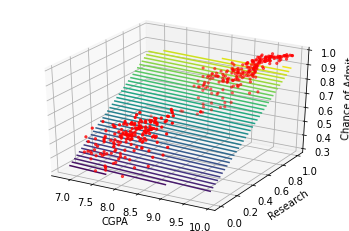

In [51]:
X6, X7 = np.meshgrid(x6, x7)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_['x6'], X_['x7'], y, marker='.', color = 'red')
ax.contour3D(X6, X7, z, 50)
ax.set_xlabel('CGPA')
ax.set_ylabel('Research')
ax.set_zlabel('Chance of Admit')
plt.show()